In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Introducción 

La Optimización por Colonia de Hormigas (ACO, por sus siglas en inglés) es una técnica de optimización heurística que se inspira en el comportamiento de las hormigas en la naturaleza para encontrar rutas óptimas hacia fuentes de alimento. Esta metodología se basa en cómo las hormigas depositan feromonas en sus caminos hacia una fuente de alimento, marcando rutas que otras hormigas seguirán, preferentemente aquellas con concentraciones más altas de feromonas, que indican caminos más cortos o más deseables.

### Aplicaciones de la Optimización por Colonia de Hormigas

La ACO ha encontrado aplicaciones en una variedad de problemas de optimización, especialmente aquellos que pueden modelarse como la búsqueda de rutas o caminos, tales como:

- **Problemas de ruta más corta**: Donde se busca la ruta más corta entre dos puntos, como en sistemas de navegación o en la optimización de redes de telecomunicaciones.
- **Problemas de asignación de tareas**: Asignar de manera óptima recursos o tareas a agentes, por ejemplo, en la planificación de la producción o en la logística.
- **Problemas de programación de vehículos**: Optimizar las rutas de entrega para minimizar la distancia total recorrida o el tiempo total de viaje, útil en logística y distribución.
- **Optimización de redes**: Encontrar la configuración óptima de una red para maximizar su eficiencia o capacidad, aplicable en diseño de redes de computadoras o de suministros.
- **Diseño de circuitos electrónicos**: Optimizar la disposición de los componentes en un circuito para mejorar su rendimiento o reducir su tamaño.

### Uso en Optimización Heurística

La ACO es una técnica heurística porque se basa en una regla práctica, más que en un proceso garantizado para encontrar una solución óptima global. La fortaleza de ACO radica en su capacidad para encontrar buenas soluciones en problemas complejos y altamente combinatorios, donde otros métodos pueden ser computacionalmente inviables. Sin embargo, al ser una heurística, no garantiza encontrar la solución óptima global, especialmente en problemas con espacios de búsqueda muy amplios o complejos.

# Función a Optimizar: Eggholder

**Forma General:**
$$
f(x_1,x_2) = -(x_2 + 47) \sin\left(\sqrt{\left| x_2 + \frac{x_1}{2} + 47\right|}\right) - x_1 \sin\left(\sqrt{\left|x_1 - (x_2 + 47)\right|}\right)
$$

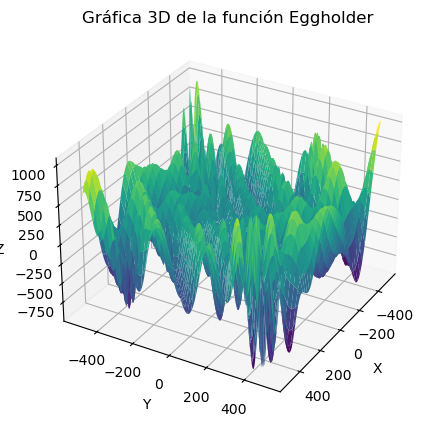

In [72]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

# Gráfica 3D
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Eggholder')
    plt.show()

plot_3d()

# Algoritmo de Optimización por Colonia de Hormigas (ACO)

El código implementa un algoritmo de optimización por colonia de hormigas (ACO) para encontrar el mínimo global de la función Eggholder.

## Resolución de la Función Eggholder con ACO

### Evolución de la Función de Desempeño

La gráfica de la evolución de la función de desempeño a lo largo de las iteraciones del algoritmo muestra cómo el valor de la función de desempeño disminuye con el tiempo, lo que indica que el algoritmo está encontrando soluciones cada vez mejores. Aunque a comparación de los algoritmos genéticos, el ACO es más lento en encontrar soluciones óptimas y la evolución es más escalonada.

## Mejor Solución Encontrada

La mejor solución encontrada por el algoritmo durante esta ejecución es:

- Coordenadas: $x = 436.48840526$, $y = 451.18728948$
- Valor de la función Eggholder en estas coordenadas: $-933.6965751290611$

La mejor solución encontrada está en [436.48840526 451.18728948] con un valor de -933.6965751290611


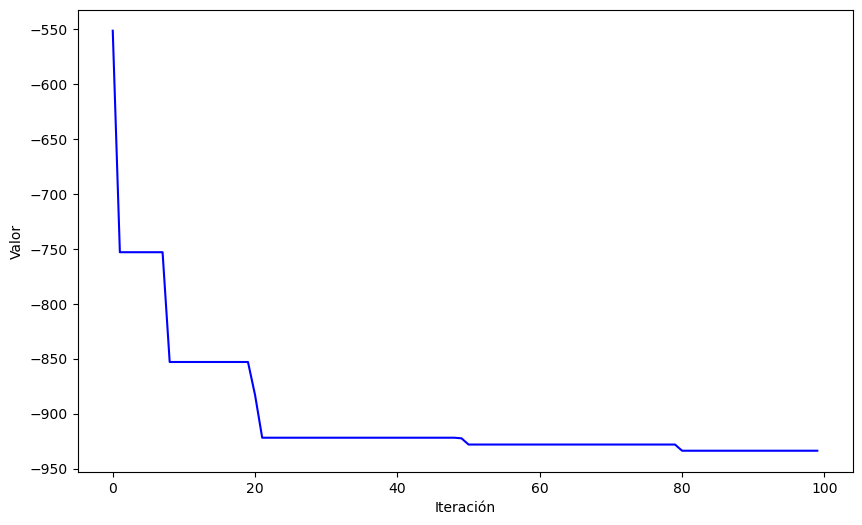

In [93]:
# Parámetros dados por el algoritmo

n = 2  # dos dimensiones para la función Eggholder
alpha = 1  # importancia de la cantidad de feromona
beta = 0  # en este caso, no usaremos una función heurística
rho = 0.1  # tasa de evaporación
Q = 1  # constante de depósito
num_hormigas = 30  # número de hormigas
num_iteraciones = 100  # número de iteraciones
B = 30  # número de intervalos discretizados por dimensión
tau_0 = 0.1  # feromona inicial

# Función Eggholder redefinida para la discretización
def eggholder(x):
    x1, x2 = x
    return -(x2 + 47) * np.sin(np.sqrt(abs(x2 + x1/2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

# Discretización del espacio de búsqueda
x_min, x_max = -512, 512
y_min, y_max = -512, 512
x_grid = np.linspace(x_min, x_max, B)
y_grid = np.linspace(y_min, y_max, B)
intervalos = np.array([x_grid, y_grid])

# Inicialización de feromonas
tau = np.ones((n, B - 1)) * tau_0

# Algoritmo AS
mejor_sol_global = None
mejor_costo_global = float('inf')
historial_optimos = []

for it in range(num_iteraciones):
    soluciones = []
    optimos = np.zeros(num_hormigas)
    
    # Construcción de la solución por cada hormiga
    for k in range(num_hormigas):
        sol = np.zeros(n)
        for i in range(n):
            # Seleccionamos el intervalo basado en las feromonas
            p = tau[i] ** alpha / np.sum(tau[i] ** alpha)
            intervalo = np.random.choice(range(B - 1), p=p)
            sol[i] = np.random.uniform(intervalos[i][intervalo], intervalos[i][intervalo + 1])

        optimo = eggholder(sol)
        soluciones.append(sol)
        optimos[k] = optimo
        
        # Actualización de la mejor solución global
        if optimo < mejor_costo_global:
            mejor_sol_global = sol
            mejor_costo_global = optimo

    historial_optimos.append(mejor_costo_global)
    
    # Actualización de la feromona
    for i in range(n):
        for j in range(B - 1):
            tau[i, j] = (1 - rho) * tau[i, j]
            if np.any([np.allclose(sol[i], intervalos[i, j]) for sol in soluciones]):
                tau[i, j] += Q / mejor_costo_global

# Imprimir la mejor solución encontrada
print(f"La mejor solución encontrada está en {mejor_sol_global} con un valor de {mejor_costo_global}")

# Gráfica del historial de soluciones
plt.figure(figsize=(10, 6))
plt.plot(historial_optimos, linestyle='-', color='b')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.show()

# Visualización de la Mejor Solución Encontrada

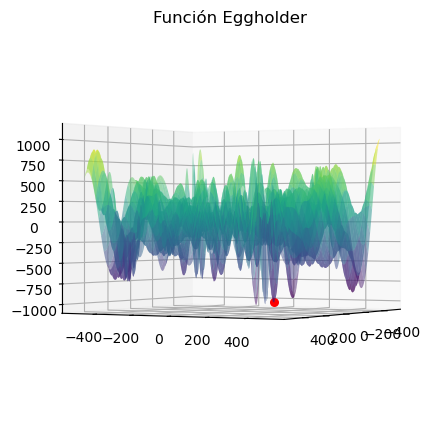

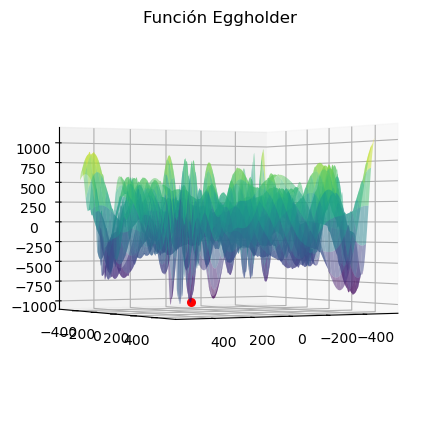

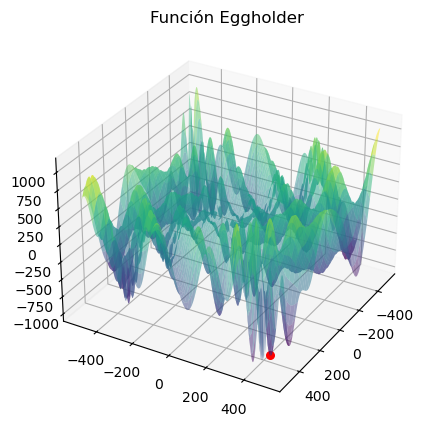

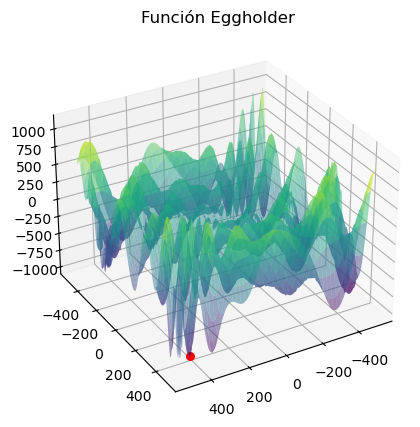

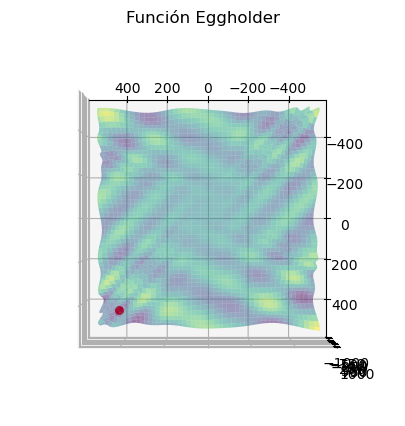

In [95]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

def plot_3D(elev=0, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none').set_alpha(0.5)
    ax.scatter( mejor_sol_global[0], mejor_sol_global[1], mejor_costo_global, color='r', s=30, label='Mejor solución')
    ax.set_title('Función Eggholder')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

plot_3D()
plot_3D(0, 60)
plot_3D(30, 30)
plot_3D(30, 60)
plot_3D(90, 90)

# Conclusiones

### Ventajas de la Optimización por Colonia de Hormigas

1. **Adaptabilidad:** El algoritmo se adapta continuamente, buscando nuevas soluciones que se ajusten a las condiciones actuales.

2. **Robustez y flexibilidad:** ACO es capaz de encontrar buenas soluciones para una amplia gama de problemas sin necesidad de ajustes significativos en el algoritmo. Esto lo hace útil en situaciones donde los detalles del problema no son completamente conocidos de antemano, por eso en ejemplos como el de el problema del viajero se busca que las hormigas tengan conocimiento del problema y se adapten a las condiciones actuales.

3. **Optimización multiobjetivo:** Puede manejar problemas donde hay que optimizar simultáneamente varios objetivos, encontrando soluciones que representen un buen compromiso entre ellos.

4. **Búsqueda de soluciones óptimas globales:** A través de la exploración continua y el mecanismo de retroalimentación positiva basado en feromonas, la ACO tiene una buena probabilidad de encontrar soluciones óptimas globales en problemas complejos.

### Desventajas de la Optimización por Colonia de Hormigas

1. **Convergencia lenta:** Para problemas de gran tamaño o alta complejidad, la ACO puede tardar mucho en converger a una solución óptima, lo que requiere una cantidad significativa de tiempo de computación. Pude notar como con los algoritmos genéticos las iteraciones eran más rápidas y la convergencia era más rápida en comparación con el ACO.

2. **Dependencia de parámetros:** El rendimiento del algoritmo puede ser muy sensible a la configuración de sus parámetros. Encontrar la configuración óptima de parámetros puede ser un desafío en sí mismo y puede requerir un conocimiento profundo del problema específico que se está abordando. Por ejemplo al cambiar la cantidad de hormigas se puede notar una mejora al momento de encontrar la solución, pero la ejecución del algoritmo es más lenta. 

3. **Riesgo de estancamiento:** Aunque la ACO es buena para encontrar soluciones óptimas globales, existe el riesgo de que el algoritmo se estanque en óptimos locales, especialmente si la evaporación de feromonas no se maneja adecuadamente.

En conclusión, la Optimización por Colonia de Hormigas es una técnica poderosa y versátil que ha encontrado aplicaciones exitosas en una variedad de problemas de optimización. Sin embargo, como con cualquier enfoque de optimización, tiene sus ventajas y desventajas. La selección de ACO como método de solución debe basarse en una evaluación cuidadosa de las características específicas del problema, así como en los recursos computacionales disponibles.